# Design Automation for Organs-on-Chip

This tutorial covers the automated design for multi-organ-on-chip geometries developed by the Chair for Design Automation at the Technical University of Munich as part of the Munich MicroFluidic Toolkit (MMFT). This method includes the orchestration of several aspects like the size of organ modules, the required shear stress on membranes, the dimensions and geometry of channels, pump pressures, etc., and by this improves the design task for multi-organ-on-chips. 

The design can be translated to a 2D network (.svg) and exported to a 3D geometry definition (.stl). The 3D .stl format is common for computer designed 3D models and can be uploaded in most simulation software or directly fabricated, e.g., in 3D printing software (e.g. preform) and printed. 

This is a more detailed description of the code that is published at https://github.com/cda-tum/mmft-ooc-designer that results in a streamlined flow from organ tissue definition to a complex microfluidic network definition connecting these tissues in a relevant manner, this definition is then translated to an actual geometry definition for multi-organ-on-chips and producing a ready-to-simulate or ready-to-fabricate result. 

----

# Step-by-step Tutorial
In the following a step-by-step tutorial on how to use the design automation method for multi-organ-on-chips. Based on input values the chip is first defined and then exported to a geometry. 

For this, please follow the steps described below, and execute each cell by clicking on the run button.

### 1. Package installation/import
First, the required packages and functions need to be imported. It might be necessary to first install all requirements. For this you will need to install python, and then in your IDE or teminal type:

pip install -r requirements.txt

Then you can import and use the code and its functions.

In [1]:
import os
import json
import sys
import visualization_def as vd
from ooc_da import run
import ipywidgets as widgets

### 2. Organ Module Definition
Now, the tool is ready to be used. For this you can choose a template input file and adapt it to your needs.

In the following the 'ooc_male_simple' example is used as a template. The chip definitions, the number of organ modules, and their respective values can be adapted, all values are defined in SI units.

The output_path defines where the data will be stored.

In [2]:
# Path to the input JSON file and its name
input_directory = 'architectures'
filename = 'ooc_male_simple.json'

output_path = 'architectures/newfile.json'

The template file can be adapted in the following cell. You can modify the chip details, including the parameters defining the chip geometry, the specifications for the fluid filling the microfluidic channel network, and the reference values. Additionally, you can customize the modules by adjusting the requirements for each specific module or by adding or removing a module.

Note: Please make sure to click save, even if you did not alter the parameters.

In [3]:
vd.display_architectures(input_directory, filename, output_path)

HTML(value="<hr><h4 style='text-align:left;'>Chip Details</h4><hr>", layout=Layout(margin='10px 0 10px 0'))

Button(button_style='info', description='Save Changes', style=ButtonStyle())

### 3. Automatically Design the Chip
Define the output directory (folder) and file name for where the new design definition will be stored. The data types are checked and the design automation method is performed. Please make sure to check if the file name already exists to avoid overwriting any data.

The output file contains the channel lengths required for the desired flow rates in the microfluidic channel network. This output is used for further geometry definitions in the following steps.

In [4]:
design_outputfile = 'architectures/design_result/design_result.json'

In [5]:
# adapt this to the path of the JSON file you want to use
input_file = 'architectures/newfile.json' 
run(input_file, design_outputfile)

Solution converged in 4 iterations.


### 4. Design the Geometry
The geometry can now be designed based on the architecture that was created in the previous step. For this, the desired output needs to be specified. 

To generate the channel positive (e.g., for subsequent simulations), set the *channel_negative* variable to *False*. Conversely, to generate the chip definition (e.g., for subsequent fabrication), set the *channel_negative* variable to *True*.

Additionally, you can define whether you want the output to be in meters or millimeters (this is sometimes required for 3D printing software).

In [7]:
vd.display_bool_widgets()

Checkbox(value=True, description='Channel Negative', style=DescriptionStyle(description_width='initial'))

Checkbox(value=True, description='Unit Conversion to mm', style=DescriptionStyle(description_width='initial'))

### Optional: Define the Chip Geometry
If you want to generate the chip you can define the size of the chip (the distance from the channels to the sides) and the inlet size to connect the pump tubing. The input is in SI units. 

Note: Please run this cell regardless of if you want to define the chip geometry or not.

In [9]:
vd.display_chip_size_widgets()

FloatText(value=0.0006, description='Bottom [m]:', layout=Layout(width='300px'), step=1e-06, style=Description…

FloatText(value=0.0006, description='Top [m]:', layout=Layout(width='300px'), step=1e-06, style=DescriptionSty…

FloatText(value=0.0014999999999999998, description='Sides [m]:', layout=Layout(width='300px'), step=1e-06, sty…

FloatText(value=0.0006, description='Pump Tubing Radius [m]:', layout=Layout(width='300px'), step=1e-06, style…

Variables updated
Variables updated
Variables updated
Variables updated


### 5. Import the Generated Design Result
The design result generated in step 4. is now imported. 
The node and channel positions can be verified in the python plot below that visualizes the placement of channels.

This is translated to a 2D geometry and then extruded to a 3D geometry, including the surrounding geometry definition. Both the resulting 2D network as well as the 3D geometry are visualized below and saved locally. The geometry is saved as the file (optionally in the folder) that you define as *output_file*.

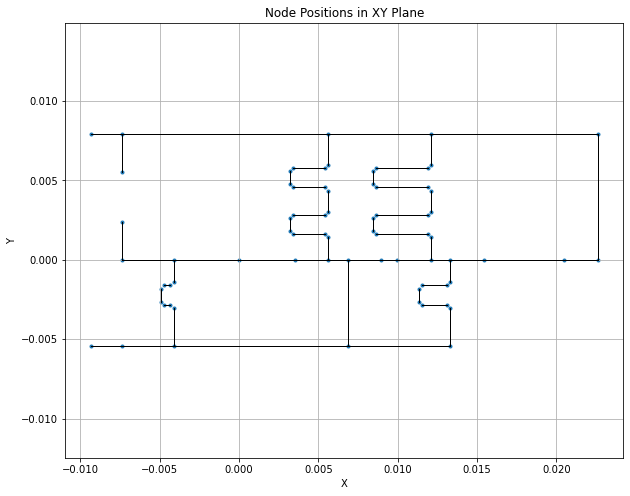

In [15]:
from OOCGenerator import read_in_network_file, plot_nodes

nodes, pumps, channels, arcs, height, organ_channels = read_in_network_file(design_outputfile)

plot_nodes(nodes, channels)

In [16]:
from OOCGenerator import create_stl_file, create_svg_network_2D

In [17]:
stl_output_name = 'stl_output.stl'
channel_negative = vd.get_channel_negative()
bottom, top, sides, pump_radius = vd.get_chip_dimensions()
create_stl_file(nodes, pumps, channels, arcs, height, bottom, top, sides, pump_radius, organ_channels, stl_output_name, channel_negative)

[[[-9.3375 -5.95   -0.15  ]
  [-9.3375 -4.95   -0.15  ]
  [-9.3375 -5.95    0.15  ]
  [-9.3375 -4.95    0.15  ]]

 [[-9.3375  7.4    -0.15  ]
  [-9.3375  8.4    -0.15  ]
  [-9.3375  7.4     0.15  ]
  [-9.3375  8.4     0.15  ]]

 [[-7.5875  2.37   -0.15  ]
  [-7.0875  2.37   -0.15  ]
  [-7.5875  2.37    0.15  ]
  [-7.0875  2.37    0.15  ]]

 [[-7.5875  5.53   -0.15  ]
  [-7.0875  5.53   -0.15  ]
  [-7.5875  5.53    0.15  ]
  [-7.0875  5.53    0.15  ]]]
SVG file "output2D.svg" created successfully.
STL file "stl_output.stl" created successfully.


### 6. Congratulations! 
You have created a multi-organ-on-chip geometry. The 2D image (.svg) and the 3D geometry are stored locally on your PC in the same folder as the Tutorial. Below the image and geometry are visualized.

In [18]:
vd.display_2D_svg('output2D.svg')

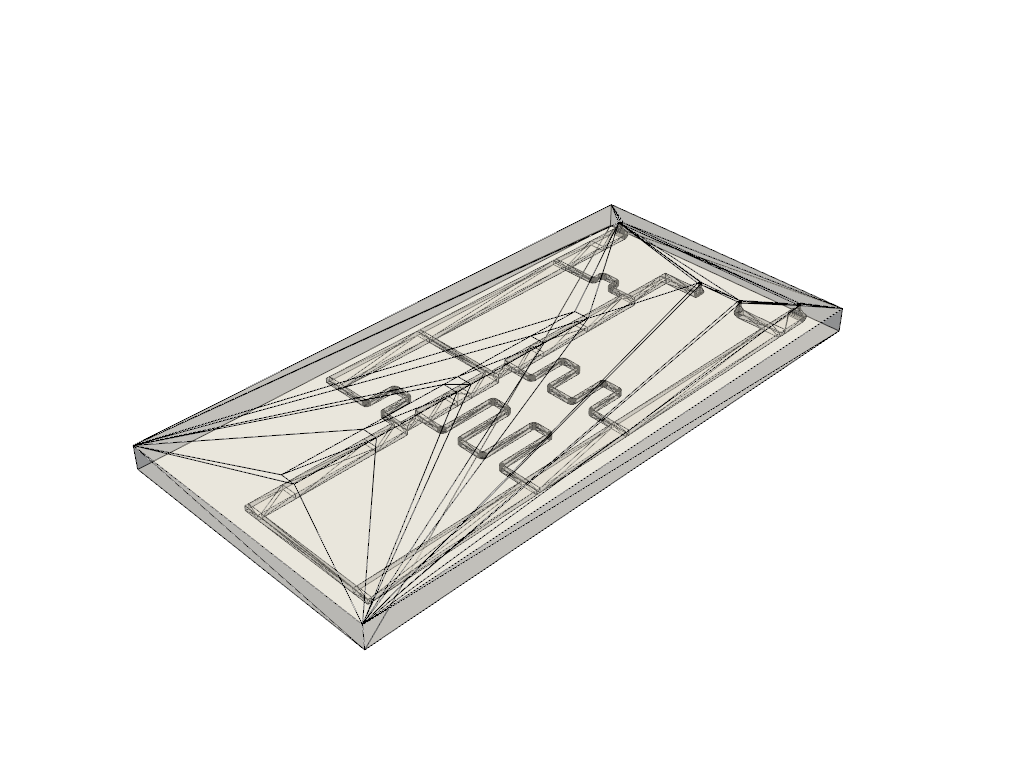

In [19]:
vd.display_3D_mesh('stl_output.stl')